In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# # Drop any rows with missing values, if necessary
data = pd.read_csv('./dataset_train_4_0to200.csv')

In [2]:
# Select the features (input variables) and the target (output variable)
X = data[['Delivery Hour', 'Temperature in F', 'Load in Houston']]
y = data['Settlement Point Price']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

[12.01799387 36.27728806 13.85943366 ... 15.64547456 17.92114625
 28.76011248]


In [4]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

error_lr = np.round(y_test,2)-np.round(y_pred,2)
error_lr=error_lr.reset_index()["Settlement Point Price"]

Mean Squared Error (MSE): 1232.2534255864982
R-squared (R2) Score: 0.04998376196489629


In [5]:
i=0
count=0
print(error_lr[0])
for i in range(len(error_lr)):
    if ((error_lr[i])>5) or ((error_lr[i]<-5)):
        count=count+1
a = len(y_pred) - count
accuracy = (a/len(y_pred))*100
print('accuracy:', accuracy)

0.370000000000001
accuracy: 61.61951501154734


In [8]:
for j in range(1,11):
    i=0
    count=0
    for i in range(len(error_lr)):
        if ((error_lr[i])>j) or ((error_lr[i]<-j)):
            count=count+1
    a = len(y_pred) - count
    accuracy = (a/len(y_pred))*100
    print("accuracy: with threshold of %i"%j," is %.2f"%accuracy)

accuracy: with threshold of 1  is 13.97
accuracy: with threshold of 2  is 27.71
accuracy: with threshold of 3  is 40.55
accuracy: with threshold of 4  is 51.63
accuracy: with threshold of 5  is 61.62
accuracy: with threshold of 6  is 70.09
accuracy: with threshold of 7  is 76.36
accuracy: with threshold of 8  is 81.52
accuracy: with threshold of 9  is 85.58
accuracy: with threshold of 10  is 88.86


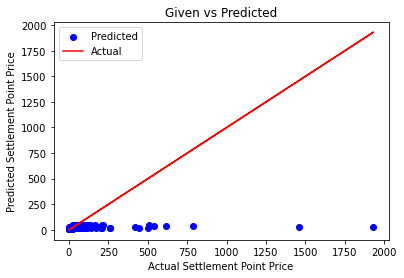

In [11]:
# Plot the given vs predicted graph
plt.scatter(y_test, y_pred, color='b', label='Predicted')
plt.plot(y_test, y_test, color='r', label='Actual')
plt.xlabel('Actual Settlement Point Price')
plt.ylabel('Predicted Settlement Point Price')
plt.legend()
plt.title('Given vs Predicted')
plt.show()